# HAND WRITTEN NUMBER RECPGNISION - TENSERFLOW

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist


In [4]:
# Parameters
num_class = 10
num_features = 28 * 28
learning_rate = 0.001
batch_size = 256
training_steps = 6000
display_step = 100
n_hidden1 = 128
n_hidden2 = 256




In [5]:

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten and normalize the data
x_train = np.array(x_train, dtype=np.float32).reshape([-1, num_features]) / 255.0
x_test = np.array(x_test, dtype=np.float32).reshape([-1, num_features]) / 255.0

In [6]:
# Create training and test datasets
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# FORWARD PROPAGATION

In [7]:
# Initialize weights and biases
random_normal = tf.initializers.RandomNormal()

weights = {
    "h1": tf.Variable(random_normal([num_features, n_hidden1])),
    "h2": tf.Variable(random_normal([n_hidden1, n_hidden2])),
    "output": tf.Variable(random_normal([n_hidden2, num_class]))
}

biases = {
    "b1": tf.Variable(random_normal([n_hidden1])),
    "b2": tf.Variable(random_normal([n_hidden2])),
    "output": tf.Variable(random_normal([num_class]))
}


In [8]:

# Define the model
def neural_net(x):
    layer1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
    layer1 = tf.nn.sigmoid(layer1)
    layer2 = tf.add(tf.matmul(layer1, weights["h2"]), biases["b2"])
    layer2 = tf.nn.sigmoid(layer2)
    output_layer = tf.add(tf.matmul(layer2, weights["output"]), biases["output"])
    return tf.nn.softmax(output_layer)

# BACKWARD PROPAGATION

In [ ]:
# Define loss and accuracy functions
def cross_entropy(y_act, y_pred):
    y_act = tf.one_hot(y_act, depth=num_class)
    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_act, y_pred))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate)

def run_optimisers(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(y, pred)
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [ ]:

# Training loop
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimisers(batch_x, batch_y)

    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(batch_y, pred)
        acc = accuracy(pred, batch_y)
        print(f"Step: {step}, Loss: {loss.numpy():.4f}, Accuracy: {acc.numpy():.4f}")

Step: 100, Loss: 2.3162, Accuracy: 0.1055
Step: 200, Loss: 2.3058, Accuracy: 0.0742
Step: 300, Loss: 2.3029, Accuracy: 0.0664
Step: 400, Loss: 2.2971, Accuracy: 0.1133
Step: 500, Loss: 2.3012, Accuracy: 0.1094
Step: 600, Loss: 2.2980, Accuracy: 0.1133
Step: 700, Loss: 2.2977, Accuracy: 0.1172
Step: 800, Loss: 2.2986, Accuracy: 0.1211
Step: 900, Loss: 2.3055, Accuracy: 0.0898
Step: 1000, Loss: 2.2943, Accuracy: 0.1367
Step: 1100, Loss: 2.3008, Accuracy: 0.1094
Step: 1200, Loss: 2.2986, Accuracy: 0.1016
Step: 1300, Loss: 2.2945, Accuracy: 0.1406
Step: 1400, Loss: 2.2999, Accuracy: 0.1016
Step: 1500, Loss: 2.3002, Accuracy: 0.0898
Step: 1600, Loss: 2.2930, Accuracy: 0.1289
Step: 1700, Loss: 2.2954, Accuracy: 0.1055
Step: 1800, Loss: 2.2913, Accuracy: 0.1367
Step: 1900, Loss: 2.2928, Accuracy: 0.1367
Step: 2000, Loss: 2.2930, Accuracy: 0.1406
Step: 2100, Loss: 2.2943, Accuracy: 0.1094
Step: 2200, Loss: 2.2937, Accuracy: 0.1289
Step: 2300, Loss: 2.2978, Accuracy: 0.1055
Step: 2400, Loss: 2.

In [12]:
# Evaluate on test data
all_preds = []
all_labels = []

for batch_x, batch_y in test_data:
    pred = neural_net(batch_x)
    all_preds.append(pred)
    all_labels.append(batch_y)

y_pred = tf.concat(all_preds, axis=0)
y_true = tf.concat(all_labels, axis=0)

test_acc = accuracy(y_pred, y_true)
print(f"\nFinal Test Accuracy: {test_acc.numpy():.4f}")



Final Test Accuracy: 0.1135


model.prediction 1
model.prediction 1
model.prediction 1
model.prediction 1
model.prediction 1


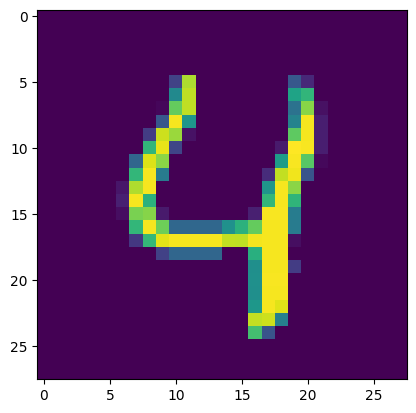

In [14]:
import matplotlib.pyplot as plt
n_image = 5
test_image = x_test[:n_image]
prediction=neural_net(test_image)
for i in range(n_image):
  plt.imshow(np.reshape(test_image[i],[28,28]))
  plt.show
  print(f"model.prediction {np.argmax(prediction.numpy()[i])}")
